<a href="https://colab.research.google.com/github/ticky1515/Toxic-messages-analysis/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA/data_label/DATA_10k_label_run.csv')

In [ ]:
#train
!gdown --id 13oygrmyW_Jlg5eBrPjMVCDykrXjZZPAc -O data.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13oygrmyW_Jlg5eBrPjMVCDykrXjZZPAc
To: /content/data.csv
100% 3.35M/3.35M [00:00<00:00, 155MB/s]


In [ ]:
df

,Column1,comment_text,hashtag,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0,กะเทยกับผ้าพลิ้วมันเป็นของคู่กัน \nคืนนี้เตรีย...,/เทยเที่ยวไทย/GMMTV,0,0,0,0,0,0.0,1
1,1,วันนี้เเว้นทั้งวัน กะเทยเเก่ทำขาชั้นไหม้,NaN,0,0,0,0,0,0.0,1
2,2,@mckers บทละครใหม่ กะเทยจดเตรียมพูดลงติ๊กต็อก ...,NaN,0,0,0,0,0,0.0,1
3,3,เบื่อๆๆๆ 😞😞😞😞 #สาวสองนครปฐม #รับงานนครปฐม #รับ...,/สาวสองนครปฐม/รับงานนครปฐม/รับงาน/นครปฐมนัดเย็...,0,0,1,0,0,0.0,0
4,4,เป็นกะเทยนะคะ อย่าเข้าใจผิดว่าเป็นผู้หญิงนะ นั...,/นัดเย็ดสมุทรปราการ/นัดเย็ดสำโรง/นัดเย็ดเทพารั...,0,0,1,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
10171,495,@AmornratJinyou1 @yugyeom น่าเกลียดน่าชังจังเลย,NaN,0,0,0,0,0,0.0,1
10172,496,เกลียดแบบไหนแล้วต้องมาเจอแบบนั้นอีก เกลียดดดดด...,NaN,0,0,0,0,0,0.0,1
10173,497,แล้วอลิเซนเรนีร่าสนิทกันเนี่ยยังมองไม่เห็นข้อเ...,NaN,0,0,0,0,0,0.0,1
10174,498,เกลียดความขี้ลืมของตัวเอง เสียดายชะมัด!,NaN,0,0,0,0,0,0.0,1


In [ ]:
df.at[8412, 'identity_hate'] = 0

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# dev version
# !pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

# release version 
! pip install pythainlp

!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pythainlp

pythainlp.__version__

'4.0.1'

In [ ]:
from pythainlp import sent_tokenize, word_tokenize

In [ ]:
import re

# Clean fixed

In [ ]:
stopwords = pythainlp.corpus.common.thai_stopwords()

In [ ]:
def main2(data):
  symbols_to_remove = "!@#$%^&*()-+={[}];:'\",<.>/?…꒰꒱“”◤◥•~"
  x = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|(\n|\r|\s|\t|\d+)|(_|ๆ|ฯ|฿)|([\u0E4D-\u0E7F]+)","",str(data)).split())
  x = re.sub(f'[{re.escape(symbols_to_remove)}]', '', x)
  x = " ".join([i for i in x.lower().split(" ") if not i.isdigit()])
  x = x.replace("เเ", "แ").replace("\u200b","")
  RE_EMOJI = re.compile(u'([\U00010000-\U0010ffff]|[\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])|([\U0001F600-\U0001F64F])|([\U0001F97A]|([\u2B55]))')
  x = RE_EMOJI.sub(r'',x)
  x = word_tokenize(x, engine="attacut")
  x = [word for word in x if word not in stopwords]
  for i in range(len(x)):
    x[i] = re.sub(r'([\u0E01-\u0E5B])\1+$', r'\1', x[i])
  x = list(filter(lambda x: len(x) > 1, x))

  return " ".join(x)

In [ ]:
main2('ฆ่าแม่ง')

'ฆ่า แม่ง'

In [ ]:
df['text_token'] = df['comment_text'].apply(main2)

In [ ]:
df['text_token']

0        กะเทย ผ้า พลิ้ว คู่ คืน เตรียม ตัว เวลาน เที่ย...
1                               แว้น กะเทย ทำ ขา ชั้น ไหม้
2                            บท ละคร กะเทย เตรียม ติ๊กต็อก
3        เบื่อ สาว สอง นครปฐม งาน นครปฐม งาน นครปฐมนัดเ...
4        กะเทย อย่า หญิง นัด ชอบ อมควย ลับ นัดเย็ดสมุทร...
                               ...                        
10171                                        เกลียด น่าชัง
10172                       เกลียด เจอ เกลียดดดดดดแม่งเอ้ย
10173    อลิเซนเรนีร่า สนิท ข้อ ทำ เรื่อง อิมแพค ใจ คน ...
10174                      เกลียด ขี้ลืม ตัว เสียดาย ชะมัด
10175                 เวลา ซ่อน เพลง ได้ยิน เพลง อด เกลียด
Name: text_token, Length: 10176, dtype: object

In [ ]:
X = df['text_token']
y = df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].apply(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Analysis

**All data**

In [ ]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-37-0891b765a168>:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [ ]:
 df['comment_text']

0        กะเทยกับผ้าพลิ้วมันเป็นของคู่กัน \nคืนนี้เตรียมตัวเลย เวลา 22:30 น. พาเที่ยว เขาช่องลม นครนายก ทางช่อง GMM25\n#เทยเที่ยวไทย\n#GMMTV\n@godji_godji  @gorfern  @JenniePanhan https://t.co/eSnDmVKH21                                                                             
1        วันนี้เเว้นทั้งวัน กะเทยเเก่ทำขาชั้นไหม้                                                                                                                                                                                                                                       
2        @mckers บทละครใหม่ กะเทยจดเตรียมพูดลงติ๊กต็อก 555555                                                                                                                                                                                                                           
3        เบื่อๆๆๆ 😞😞😞😞 #สาวสองนครปฐม #รับงานนครปฐม #รับงาน #นครปฐมนัดเย็ด #นัดเย็ดนครปฐม #กะเทย #นครชัยศรี #ศาลายา #สาย7 #สายสองมีงู #สาวเสียบ #นครปฐมในเมือง

In [ ]:
df['text_token']

0        กะเทย ผ้า พลิ้ว คู่ คืน เตรียม ตัว เวลาน เที่ยว ช่องลม นครนายก ช่องgmmเทย เที่ยว ไทย gmmtvgodji                                                            
1        แว้น กะเทย ทำ ขา ชั้น ไหม้                                                                                                                                 
2        บท ละคร กะเทย เตรียม ติ๊กต็อก                                                                                                                              
3        เบื่อ สาว สอง นครปฐม งาน นครปฐม งาน นครปฐมนัดเย็ดนัดเย็ดนครปฐมกะเทยนครชัยศรีศาลายา สายสายสอง งู สาว เสียบ นครปฐม เมือง                                     
4        กะเทย อย่า หญิง นัด ชอบ อมควย ลับ นัดเย็ดสมุทรปราการ นัดเย็ดสำโรงนัดเย็ดเทพารักษ์ นัดเย็ดวัดด่านสำโรง นัดอมควยอมควย สำโรงเทพารักษ์ วัดด่าน                 
                                                                            ...                                                                                     
10171    เ

In [ ]:
all_data_value_count = []
for i in y:
    all_data_value_count.append(y[i].value_counts())

In [ ]:
all_data_value_count = pd.DataFrame(all_data_value_count)
all_data_value_count

,0,1
toxic,8274,1902
severe_toxic,10047,129
obscene,7927,2249
threat,10007,169
insult,9371,805
identity_hate,9975,201


In [ ]:
import plotly.express as px
all_data_fig = px.bar(all_data_value_count, title="All data of each class", barmode='group', text_auto=True, labels={
                     "index": "Class"
                     })
newnames = {'0':'0', '1': '1'}
all_data_fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
all_data_fig.show()

**Train data** แบ่งข้อมูล Train data เป็น 70% โดยใช้วิธีการ Train-test split

In [ ]:
data_value_count = []
for i in y_train:
    data_value_count.append(y_train[i].value_counts())

In [ ]:
data_value_count = pd.DataFrame(data_value_count)
data_value_count

,0,1
toxic,5814,1309
severe_toxic,7040,83
obscene,5568,1555
threat,7002,121
insult,6556,567
identity_hate,6990,133


In [ ]:
import plotly.express as px
fig = px.bar(data_value_count, title="Train set of each class", barmode='group', text_auto=True, labels={
                     "index": "Class"
                     })
newnames = {'0':'0', '1': '1'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

วัดความยาวของข้อความ

In [ ]:
concat_XY = pd.concat([X_train, y_train], axis = 1)

In [ ]:
concat_XY['len_text'] = concat_XY['text_token'].str.split().apply(len)

In [ ]:
for i in concat_XY['text_token']:
  print(i)

Streaming output truncated to the last 5000 lines.
วิธี แก้ เครียด ดี เย็ด
ตาย
ปัญญาอ่อน
นึก ไลฟ์ ไอจี ปลุกปาย ห้อง พี่ขามสิ ปล่อย คน จั่งได๋ สิหลึด เข้าเด้ ขอโทษ พี่ คน หยาบ นุ๊กปาย คุย แซ่บ โชว์ xนุ๊กปาย
ชั้น ถาม ปัญญาอ่อน ขนาด
หนัง โป้ ฟรีจร้า น้องเบล โดน ผัวเย็ด สด แตก ใส่ ชุด แดง นั่งโม๊กควย แฟน
ถาม หวาน หวาน อง น้ำตาล ดี แนะนำ กิน นม โอ้ต นม จืด ดี ผสม ซีเรียล กิน น้า
สาเหตุ แฟน คน สตทหญิง ทำร้าย ร่าง ทหาร กลัว สตท หญิง เจ็บ มือ เจ็บ เท้า โหน กระแส
กาก ไอ ทรู ล่ม
เฌอพัฒน์ ตอบกลับ เอ่ย ปาก แน่วแน่ เมธ คน เลี้ยง เหล้า แก้ว น้ำ เปล่า จ่าย ศศิ เหล้า เมธลุก ตบ บ่า เพื่อน สองที กำลังใจ นั่ง เดิม
ทำ ชาย ชอบ ค่า ทำ หญิง ชอบ ค่า เลิกมั่นควย
คลิป โป๊ ไทยน้อง มี่ วัย รุ่น ไทย รักลีลา เด็ดดูด ควยผัว เสียว โดน เด้า ปาก เย็ด ร่อง นม
หญิง อ้วน หลอก เย็ดง่าย มั่ง นึง ใจ มั่ง เย็ด แอบ เจ็บ
ยืน แร้ว ตบ มือ รัว สถานะ พี่โอเค ยิ้ม แก้ม แตก กิน ข้าว อร่อย คุย แซ่บ โชว์ xนุ๊กปาย
ปัญญาอ่อน
แม่ หลง ใครอ่ะ ป่ะ จังหวะ ยัก คิ้ว โอ๊ยยดี อ่ะ เข้ม รบ แม่หลงอ่ะดาราจักรรักลานาใจ ห้วง สมุทรลิขิตจันทราlovelikethe

In [ ]:
concat_XY

,text_token,toxic,severe_toxic,obscene,threat,insult,identity_hate,len_text
3077,อห ฝัน ดอกเตอร์ กุ ซื้อ ชิบหาย แม่เอ้ย โหน กระแส,0,0,0,0,0,0,9
6291,จบ เฉลยเนา มู ด็อก บูยอน แม่โซยอน มั้ง รู้ ฆ่า ตัว ขีวิต สอบสวนจริงss เฉลยว่า บูยอน ลูก คน รู้ มู ด็อก บูยอน ไหม พลัง บูยอน ตอน กัก พลัง ซู จาง อุก แปรวิญญาณ รู้,0,0,0,0,0,0,31
7146,ทุเร่ดดดดดดดพด ตบ,0,0,0,1,0,0,2
2682,weibo电 视剧星汉灿烂·月 updateofficialรอ รอ รอ รอ รอ ดาราจักรรักลานาใจ ห้วง สมุทรลิขิตจันทราlovelikethegalaxy,0,0,0,0,0,0,10
4584,หลอด หัด ดูด นั่ง ดูดนอน ดูด อะไหล่ ขวด นม ขวด นม ขวด หัด ดูด คอ แคบ คอกว้างhaeiyk,0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...
5734,สมหวัง เย็ด,0,0,1,0,0,0,2
5191,ดูควย คน,0,0,1,0,0,0,2
5390,ควย,0,0,1,0,0,0,1
860,รัก หยุม หัวแหะ ตอน พี่จิ๋ว ตาย ฝัน ฝัน ตัว อ้วน ตุ้บ หา ตัว หด เอื้อม มือ ลูบ หายวับ,0,0,0,0,0,0,18


Word cloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import FreqDist


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def plot_word_cloud(pos_lst):

  plt.subplots(figsize = (8,8))
  wordcloud = WordCloud(font_path='THSarabunNew.ttf',
                        width = 400, height = 400,
                        background_color ='white',
                        min_font_size = 10).generate_from_frequencies(pos_lst)

  plt.imshow(wordcloud) # image show
  plt.axis('off') # to off the axis of x and y
  plt.savefig('Plotly-World_Cloud.png')
  plt.show()

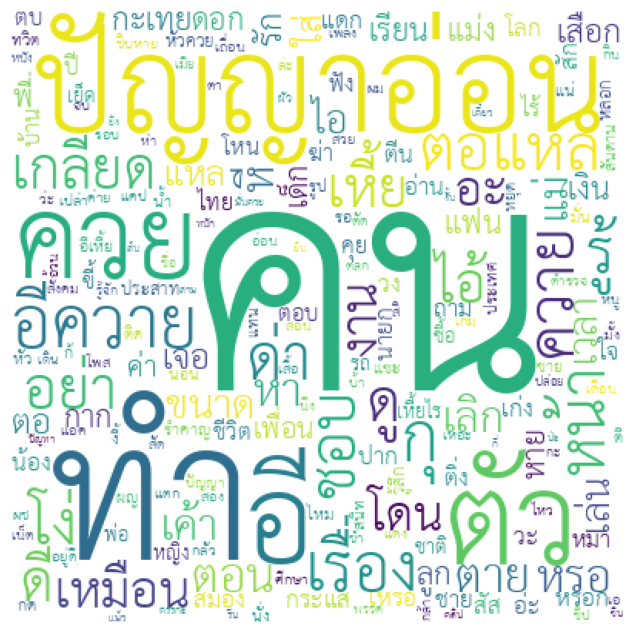

In [ ]:
plot_word_cloud(FreqDist(nltk.word_tokenize(' '.join(concat_XY[concat_XY["toxic"]==1]["text_token"]))))

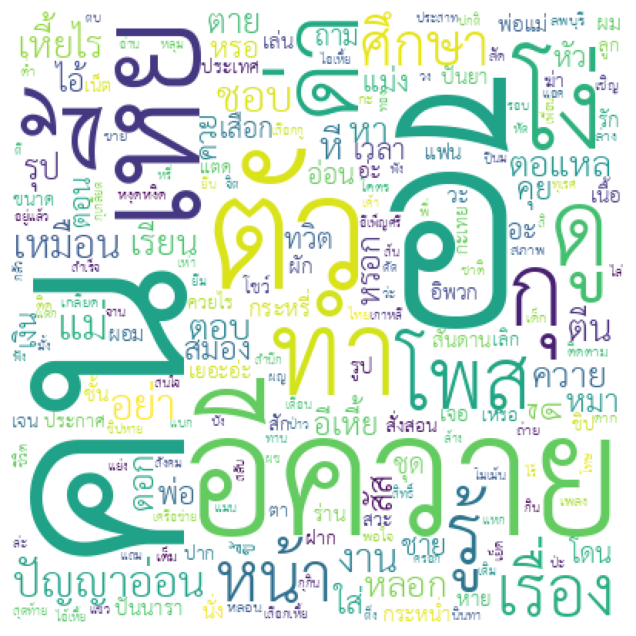

In [ ]:
plot_word_cloud(FreqDist(nltk.word_tokenize(' '.join(concat_XY[concat_XY["severe_toxic"]==1]["text_token"]))))

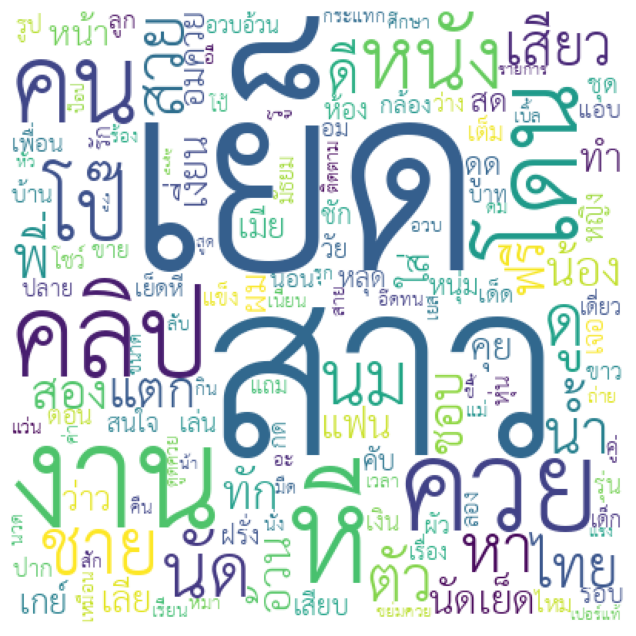

In [ ]:
plot_word_cloud(FreqDist(nltk.word_tokenize(' '.join(concat_XY[concat_XY["obscene"]==1]["text_token"]))))

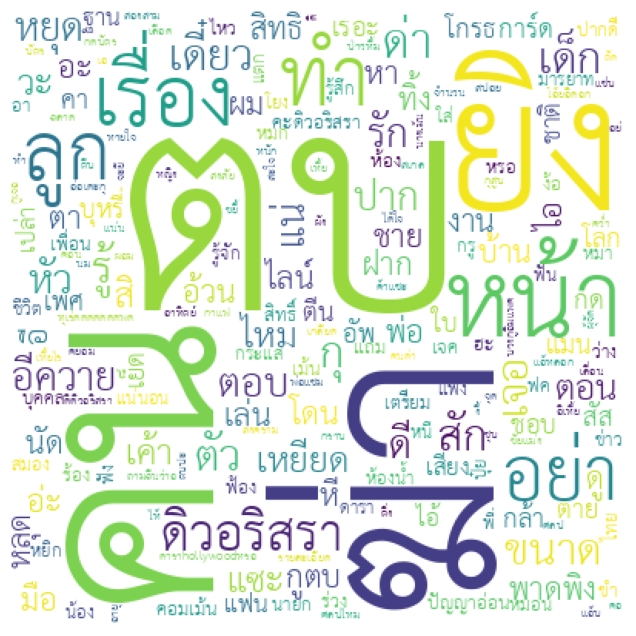

In [ ]:
plot_word_cloud(FreqDist(nltk.word_tokenize(' '.join(concat_XY[concat_XY["threat"]==1]["text_token"]))))

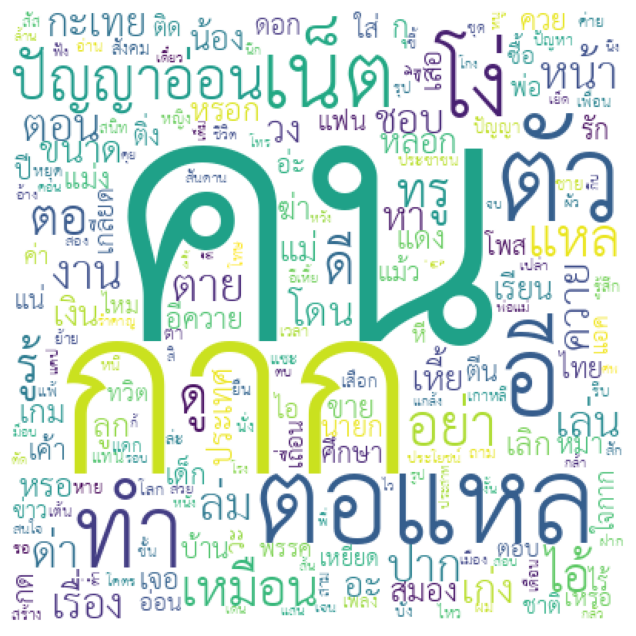

In [ ]:
plot_word_cloud(FreqDist(nltk.word_tokenize(' '.join(concat_XY[concat_XY["insult"]==1]["text_token"]))))

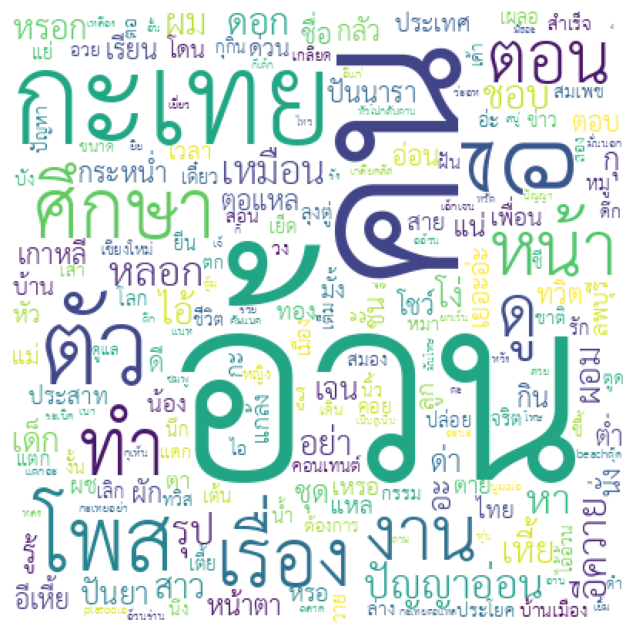

In [ ]:
plot_word_cloud(FreqDist(nltk.word_tokenize(' '.join(concat_XY[concat_XY["identity_hate"]==1]["text_token"]))))

ความยาวประโยคที่มากที่สุดของข้อความใน Train data

In [ ]:
concat_XY['len_text'].max()

58

ความยาวประโยคที่น้อยที่สุดของข้อความใน Train data

In [ ]:
concat_XY['len_text'].min()

1

ความยาวเฉลี่ยของข้อความใน Train data

In [ ]:
concat_XY['len_text'].mean()

10.985118629790819

ความยาว มาก-น้อย-เฉลี่ย ของข้อความ class Toxic

In [ ]:
toxic_count = concat_XY[concat_XY['toxic'] == 1]

In [ ]:
toxic_count['len_text'].max()

58

In [ ]:
toxic_count['len_text'].min()

1

In [ ]:
toxic_count['len_text'].mean()

10.532467532467532

ความยาว มาก-น้อย-เฉลี่ย ของข้อความ class Severe_toxic

In [ ]:
severe_toxic_count = concat_XY[concat_XY['severe_toxic'] == 1]

In [ ]:
severe_toxic_count['len_text'].max()

42

In [ ]:
severe_toxic_count['len_text'].min()

2

In [ ]:
severe_toxic_count['len_text'].mean()

18.843373493975903

ความยาว มาก-น้อย-เฉลี่ย ของข้อความ class obscene

In [ ]:
obscene_count = concat_XY[concat_XY['obscene'] == 1]

In [ ]:
obscene_count['len_text'].max()

44

In [ ]:
obscene_count['len_text'].min()

1

In [ ]:
obscene_count['len_text'].mean()

11.038585209003216

ความยาว มาก-น้อย-เฉลี่ย ของข้อความ class threat

In [ ]:
threat_count = concat_XY[concat_XY['threat'] == 1]

In [ ]:
threat_count['len_text'].max()

39

In [ ]:
threat_count['len_text'].min()

1

In [ ]:
threat_count['len_text'].mean()

7.694214876033058

ความยาว มาก-น้อย-เฉลี่ย ของข้อความ class insult

In [ ]:
insult_count = concat_XY[concat_XY['insult'] == 1]

In [ ]:
insult_count['len_text'].max()

42

In [ ]:
insult_count['len_text'].min()

1

In [ ]:
insult_count['len_text'].mean()

11.206349206349206

ความยาว มาก-น้อย-เฉลี่ย ของข้อความ class identity_hate

In [ ]:
identity_hate_count = concat_XY[concat_XY['identity_hate'] == 1]

In [ ]:
identity_hate_count['len_text'].max()

39

In [ ]:
identity_hate_count['len_text'].min()

1

In [ ]:
identity_hate_count['len_text'].mean()

8.669172932330827

In [ ]:
df_count = pd.DataFrame({"Class":['allclass', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],"maxlen":[concat_XY['len_text'].max(), toxic_count['len_text'].max(), severe_toxic_count['len_text'].max(), obscene_count['len_text'].max(), threat_count['len_text'].max(), insult_count['len_text'].max(), identity_hate_count['len_text'].max()], 
                         "minlen":[concat_XY['len_text'].min(), toxic_count['len_text'].min(), severe_toxic_count['len_text'].min(), obscene_count['len_text'].min(), threat_count['len_text'].min(), insult_count['len_text'].min(), identity_hate_count['len_text'].min()], 
                         "meanlen":[concat_XY['len_text'].mean(), toxic_count['len_text'].mean(), severe_toxic_count['len_text'].mean(), obscene_count['len_text'].mean(), threat_count['len_text'].mean(), insult_count['len_text'].mean(), identity_hate_count['len_text'].mean()]})

data frame แสดง ความยาว มาก-น้อย-เฉลี่ย ของข้อความแต่ละ class

In [ ]:
df_count

,Class,maxlen,minlen,meanlen
0,allclass,58,1,10.985119
1,toxic,58,1,10.532468
2,severe_toxic,42,2,18.843373
3,obscene,44,1,11.038585
4,threat,39,1,7.694215
5,insult,42,1,11.206349
6,identity_hate,39,1,8.669173


ความถี่ของคำใน class toxic

In [ ]:
toxicdict = []
for i in toxic_count['text_token'].str.split():
  toxicdict.extend(i)

In [ ]:
toxicdict

['เมีย',
 'สัก',
 'คน',
 'เวลา',
 'ต่อหน้า',
 'เพื่อน',
 'ทำ',
 'ตัว',
 'ผัว',
 'ดี',
 'ลับ',
 'เย็ดเมีย',
 'เยี่ยว',
 'แตกขา',
 'สั่นทรีต',
 'เมีย',
 'กลาย',
 'เด็กร่าน',
 'ติด',
 'ควย',
 'ทั้งเนื้อทั้ง',
 'ตัว',
 'น้ำ',
 'เงี่ยน',
 'นอน',
 'แหก',
 'หี',
 'รอ',
 'กูเย็ด',
 'เตียง',
 'เงี่ยน',
 'ว่ะ',
 'ยืม',
 'เมจforsexnsfwxroleplay',
 'ปัญญาอ่อน',
 'ไอบึ',
 'ตี',
 'ตลาด',
 'กะเทยหรอ',
 'โค้ช',
 'ไทย',
 'เก่งบลา',
 'ไร้',
 'สาระเพ้อ',
 'กีฬา',
 'อีโค้ช',
 'ไทย',
 'ล่ะ',
 'ปั้น',
 'โอกาส',
 'เล่น',
 'เสล่อ',
 'คน',
 'คน',
 'วิจารณ์',
 'วิเคราะห์',
 'ปัญญาอ่อน',
 'สันดารตอแหล',
 'platooเอ',
 'ลุงตู่',
 'รวย',
 'รัก',
 'ลุงตู่',
 'คอย',
 'สบู่',
 'ตอน',
 'อาบ',
 'น้ำ',
 'ไอ้',
 'หมู',
 'ตอน',
 'น้ำ',
 'เหลือง',
 'เยิ้ม',
 'รัง',
 'เกลียดสัส',
 'รัก',
 'เกลียด',
 'เสือก',
 'ชู',
 'ป้าย',
 'รัก',
 'เมิง',
 'ปัญญาอ่อน',
 'อ้วน',
 'ชอบ',
 'เย็ด',
 'ผอม',
 'ว้ายยเลิกมั่นควยจ้า',
 'เกลียด',
 'เคมี',
 'ชอบ',
 'เคมี',
 'เหมือน',
 'เดิม',
 'เกลียดเมดเคมยาก',
 'ชิบหาย',
 'วิชาเหี้ยไร',
 'ปัญญาอ่อน

In [ ]:
from collections import Counter
mostcommon_toxic = Counter(toxicdict).most_common(20)

In [ ]:
toxic_textlist = []
for i in mostcommon_toxic:
  toxic_textlist.append(i)

In [ ]:
toxic_textlist

[('คน', 402),
 ('ทำ', 215),
 ('ปัญญาอ่อน', 213),
 ('ตัว', 200),
 ('อี', 184),
 ('ควย', 158),
 ('อีควาย', 129),
 ('กุ', 118),
 ('เรื่อง', 110),
 ('ควาย', 105),
 ('หน้า', 104),
 ('ตอแหล', 100),
 ('ชอบ', 98),
 ('ด่า', 97),
 ('รู้', 94),
 ('โง่', 91),
 ('ดู', 88),
 ('อย่า', 87),
 ('ดี', 84),
 ('เกลียด', 82)]

ความถี่ของคำใน class severe_toxic

In [ ]:
severe_toxicdict = []
for i in severe_toxic_count['text_token'].str.split():
  severe_toxicdict.extend(i)

In [ ]:
from collections import Counter
mostcommon_severe_toxic = Counter(severe_toxicdict).most_common(20)

In [ ]:
severe_toxic_textlist = []
for i in mostcommon_severe_toxic:
  severe_toxic_textlist.append(i)

In [ ]:
severe_toxic_textlist

[('อี', 44),
 ('คน', 44),
 ('อีควาย', 28),
 ('ตัว', 24),
 ('เหี้ย', 21),
 ('ทำ', 20),
 ('โง่', 18),
 ('ด่า', 16),
 ('ดู', 16),
 ('กุ', 15),
 ('โพส', 15),
 ('รู้', 14),
 ('หน้า', 14),
 ('เรื่อง', 14),
 ('ศึกษา', 14),
 ('ปัญญาอ่อน', 13),
 ('แม่', 13),
 ('ชอบ', 13),
 ('อย่า', 12),
 ('งาน', 11)]

ความถี่ของคำใน class obscene

In [ ]:
obscenedict = []
for i in obscene_count['text_token'].str.split():
  obscenedict.extend(i)

In [ ]:
from collections import Counter
mostcommon_obscene = Counter(obscenedict).most_common(20)

In [ ]:
obscene_textlist = []
for i in mostcommon_obscene:
  obscene_textlist.append(i)

In [ ]:
obscene_textlist

[('เย็ด', 446),
 ('สาว', 388),
 ('งาน', 373),
 ('หี', 326),
 ('ควย', 289),
 ('โดน', 235),
 ('คลิป', 235),
 ('คน', 234),
 ('หนัง', 211),
 ('โป๊', 205),
 ('ชาย', 182),
 ('นัด', 175),
 ('นม', 168),
 ('ดู', 157),
 ('หา', 133),
 ('สวย', 129),
 ('ตัว', 115),
 ('น้ำ', 113),
 ('เสียว', 112),
 ('พี่', 110)]

ความถี่ของคำใน class threat



In [ ]:
threatdict = []
for i in threat_count['text_token'].str.split():
  threatdict.extend(i)

In [ ]:
from collections import Counter
mostcommon_threat = Counter(threatdict).most_common(20)

In [ ]:
threat_textlist = []
for i in mostcommon_threat:
  threat_textlist.append(i)

In [ ]:
threat_textlist

[('ตบ', 39),
 ('คน', 28),
 ('ฆ่า', 27),
 ('ยิง', 19),
 ('หน้า', 19),
 ('ทำ', 11),
 ('เรื่อง', 11),
 ('ลูก', 10),
 ('อย่า', 9),
 ('ดิวอริสรา', 8),
 ('ด่า', 7),
 ('เจอ', 6),
 ('ขนาด', 6),
 ('รู้', 6),
 ('กุ', 6),
 ('สัก', 6),
 ('เดี๋ยว', 6),
 ('เด็ก', 6),
 ('ตัว', 6),
 ('ปาก', 5)]

ความถี่ของคำใน class insult



In [ ]:
insultdict = []
for i in insult_count['text_token'].str.split():
  insultdict.extend(i)

In [ ]:
mostcommon_insult = Counter(insultdict).most_common(20)

In [ ]:
insult_textlist = []
for i in mostcommon_insult:
  insult_textlist.append(i)

In [ ]:
insult_textlist

[('คน', 166),
 ('กาก', 118),
 ('ตอแหล', 96),
 ('ตัว', 96),
 ('อี', 77),
 ('ทำ', 67),
 ('เน็ต', 54),
 ('โง่', 53),
 ('ปัญญาอ่อน', 51),
 ('อย่า', 49),
 ('ดี', 45),
 ('แหล', 44),
 ('เหมือน', 40),
 ('ตอ', 40),
 ('ดู', 38),
 ('รู้', 36),
 ('ทรู', 36),
 ('ไอ้', 35),
 ('งาน', 34),
 ('หน้า', 33)]

ความถี่ของคำใน class identity_hate



In [ ]:
identity_hatedict = []
for i in identity_hate_count['text_token'].str.split():
  identity_hatedict.extend(i)

In [ ]:
mostcommon_identity_hate = Counter(identity_hatedict).most_common(20)

In [ ]:
mostcommon_identity_hate

[('อ้วน', 50),
 ('คน', 35),
 ('กะเทย', 30),
 ('อี', 26),
 ('ตัว', 20),
 ('โพส', 14),
 ('ศึกษา', 12),
 ('เรื่อง', 11),
 ('ทำ', 11),
 ('หน้า', 10),
 ('งาน', 10),
 ('ตอน', 9),
 ('ดู', 9),
 ('ปัญญาอ่อน', 9),
 ('หลอก', 9),
 ('หา', 9),
 ('ชอบ', 8),
 ('เหมือน', 8),
 ('อีควาย', 8),
 ('รุป', 8)]

In [ ]:
identity_hate_textlist = []
for i in mostcommon_identity_hate:
  identity_hate_textlist.append(i)

In [ ]:
identity_hate_textlist

[('อ้วน', 50),
 ('คน', 35),
 ('กะเทย', 30),
 ('อี', 26),
 ('ตัว', 20),
 ('โพส', 14),
 ('ศึกษา', 12),
 ('เรื่อง', 11),
 ('ทำ', 11),
 ('หน้า', 10),
 ('งาน', 10),
 ('ตอน', 9),
 ('ดู', 9),
 ('ปัญญาอ่อน', 9),
 ('หลอก', 9),
 ('หา', 9),
 ('ชอบ', 8),
 ('เหมือน', 8),
 ('อีควาย', 8),
 ('รุป', 8)]

In [ ]:
df_count = df_count.drop([0])

In [ ]:
df_count["most_common(20)"] = [toxic_textlist, severe_toxic_textlist, obscene_textlist, threat_textlist, insult_textlist, identity_hate_textlist]

data frame แสดง ความยาว มาก-น้อย-เฉลี่ย และข้อความที่มีความที่มากที่สุด20คำของข้อความแต่ละ class 

In [ ]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-116-0891b765a168>:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [ ]:
df_count[['Class', 'most_common(20)']]

,Class,most_common(20)
1,toxic,"[(คน, 402), (ทำ, 215), (ปัญญาอ่อน, 213), (ตัว, 200), (อี, 184), (ควย, 158), (อีควาย, 129), (กุ, 118), (เรื่อง, 110), (ควาย, 105), (หน้า, 104), (ตอแหล, 100), (ชอบ, 98), (ด่า, 97), (รู้, 94), (โง่, 91), (ดู, 88), (อย่า, 87), (ดี, 84), (เกลียด, 82)]"
2,severe_toxic,"[(อี, 44), (คน, 44), (อีควาย, 28), (ตัว, 24), (เหี้ย, 21), (ทำ, 20), (โง่, 18), (ด่า, 16), (ดู, 16), (กุ, 15), (โพส, 15), (รู้, 14), (หน้า, 14), (เรื่อง, 14), (ศึกษา, 14), (ปัญญาอ่อน, 13), (แม่, 13), (ชอบ, 13), (อย่า, 12), (งาน, 11)]"
3,obscene,"[(เย็ด, 446), (สาว, 388), (งาน, 373), (หี, 326), (ควย, 289), (โดน, 235), (คลิป, 235), (คน, 234), (หนัง, 211), (โป๊, 205), (ชาย, 182), (นัด, 175), (นม, 168), (ดู, 157), (หา, 133), (สวย, 129), (ตัว, 115), (น้ำ, 113), (เสียว, 112), (พี่, 110)]"
4,threat,"[(ตบ, 39), (คน, 28), (ฆ่า, 27), (ยิง, 19), (หน้า, 19), (ทำ, 11), (เรื่อง, 11), (ลูก, 10), (อย่า, 9), (ดิวอริสรา, 8), (ด่า, 7), (เจอ, 6), (ขนาด, 6), (รู้, 6), (กุ, 6), (สัก, 6), (เดี๋ยว, 6), (เด็ก, 6), (ตัว, 6), (ปาก, 5)]"
5,insult,"[(คน, 166), (กาก, 118), (ตอแหล, 96), (ตัว, 96), (อี, 77), (ทำ, 67), (เน็ต, 54), (โง่, 53), (ปัญญาอ่อน, 51), (อย่า, 49), (ดี, 45), (แหล, 44), (เหมือน, 40), (ตอ, 40), (ดู, 38), (รู้, 36), (ทรู, 36), (ไอ้, 35), (งาน, 34), (หน้า, 33)]"
6,identity_hate,"[(อ้วน, 50), (คน, 35), (กะเทย, 30), (อี, 26), (ตัว, 20), (โพส, 14), (ศึกษา, 12), (เรื่อง, 11), (ทำ, 11), (หน้า, 10), (งาน, 10), (ตอน, 9), (ดู, 9), (ปัญญาอ่อน, 9), (หลอก, 9), (หา, 9), (ชอบ, 8), (เหมือน, 8), (อีควาย, 8), (รุป, 8)]"


concat before save CSV

In [ ]:
# concat_train = pd.concat([X_train, y_train], axis = 1)
# concat_test = pd.concat([X_test, y_test], axis = 1)

In [ ]:
# concat_train.to_csv('/content/drive/MyDrive/DATA/train-test DATA/train_attacut.csv')
# concat_test.to_csv('/content/drive/MyDrive/DATA/train-test DATA/test_attacut.csv')